In [84]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6) # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Engr Ebuka\Documents\movies.csv')

In [86]:
# Dataframe check

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [88]:
# Locating missing values

for col in df.columns:
    percent_missing = np.mean(df[col].isnull()) * 100
    print('{} - {:.2f}%'.format(col, percent_missing))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [90]:
# Missing values adjustment

# categorical - use mode or "Unknown"
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['writer'] = df['writer'].fillna(df['writer'].mode()[0])
df['star'] = df['star'].fillna(df['star'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['company'] = df['company'].fillna(df['company'].mode()[0])

# numeric - use mean or median
df['score'] = df['score'].fillna(df['score'].mean())
df['votes'] = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['gross'] = df['gross'].fillna(df['gross'].median())

# String - use unknown
df['released'] = df['released'].fillna('Unknown')

# budget by genre (median within genre)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df.groupby('genre')['budget'].transform(lambda x: x.fillna(x.median()))
df['budget'] = df['budget'].fillna(df['budget'].median())


#print(df.isnull().sum()) to check for missing values
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [92]:
# Data type check

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [94]:
# Data type modification

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['score'] = df['score'].round(1)

In [96]:
# Dataframe check

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [98]:
# Accurate year of release column

df['release_year'] = df['released'].str.extract(r'(\d{4})')
df['release_year'] = df['release_year'].astype('Int64')  # handles NaNs safely

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [100]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [102]:
pd.set_option('display.max_rows', None)

In [104]:
# Drop Duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

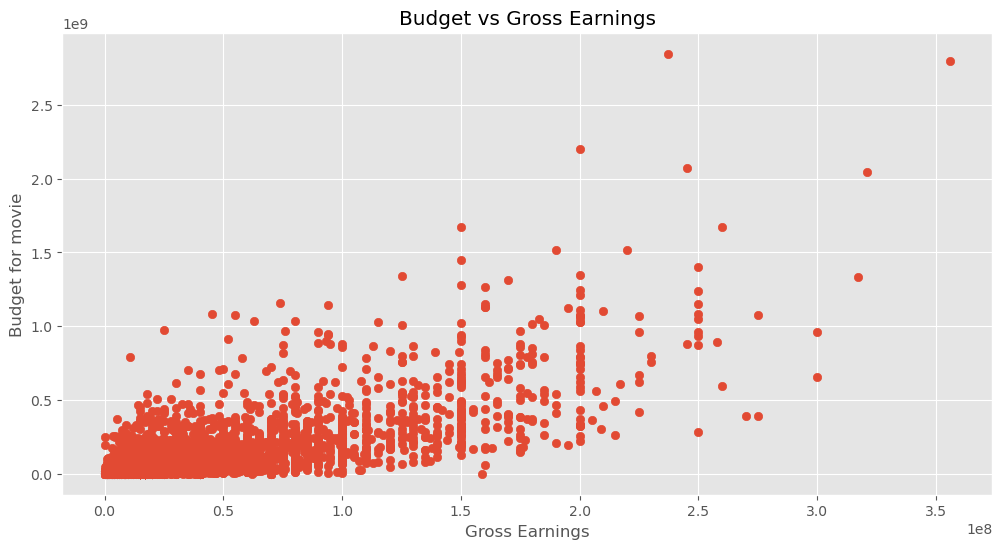

In [106]:
# Scater Plot for budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for movie')
plt.show()

In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<Axes: xlabel='budget', ylabel='gross'>

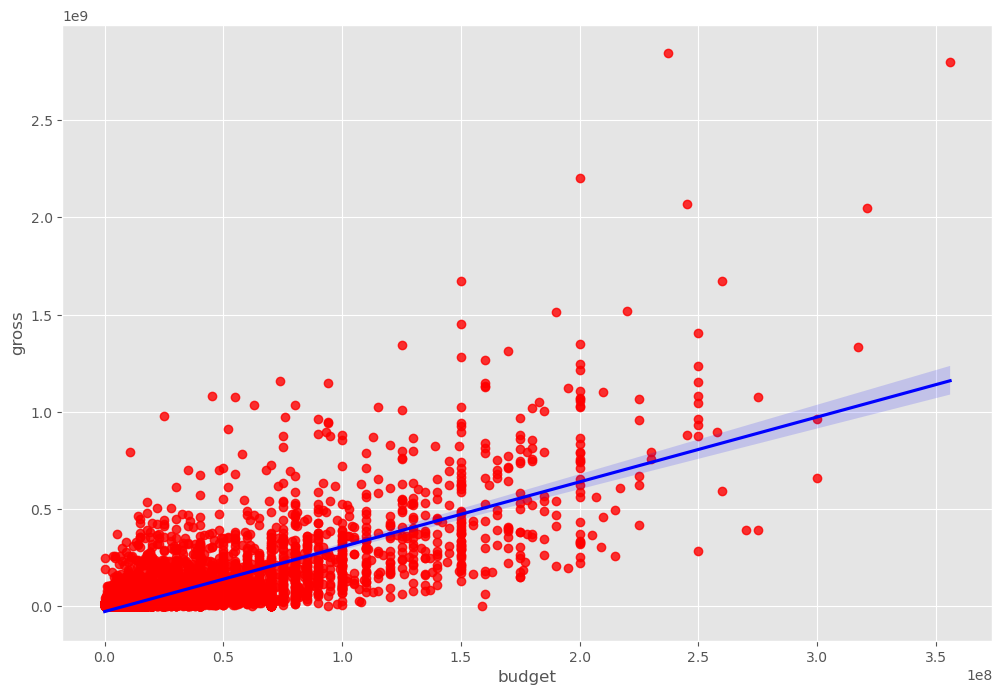

In [36]:
sns.regplot(x='budget', y='gross', data=df,
            scatter_kws={"color":"red"}, 
            line_kws={"color":"blue"})

In [38]:
# Correlation - Pearson, Kendall & Spearman

df.corr(numeric_only="True",method="pearson")

# Key Takeaways - Poasitive Correlation between budget, gross & votes 

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.097943,0.222573,0.292222,0.259504,0.120758,0.997415
score,0.097943,1.000000,0.409172,0.060608,0.185577,0.399335,0.105938
votes,0.222573,0.409172,1.000000,0.455361,0.632120,0.309139,0.218066
budget,0.292222,0.060608,0.455361,1.000000,0.737644,0.263162,0.285193
gross,0.259504,0.185577,0.632120,0.737644,1.000000,0.244355,0.252701
runtime,0.120758,0.399335,0.309139,0.263162,0.244355,1.000000,0.120599
release_year,0.997415,0.105938,0.218066,0.285193,0.252701,0.120599,1.000000


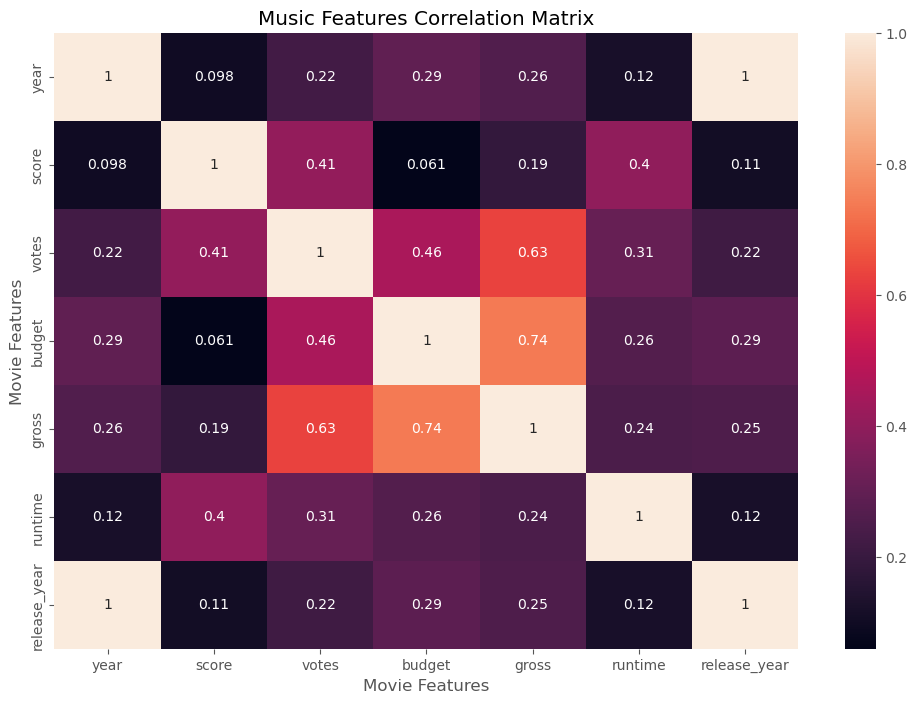

In [40]:
# Graphical representation of the correlations

correlation_matrix = df.corr(numeric_only="True",method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Music Features Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [74]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1980
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1980
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1980
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1980
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1980


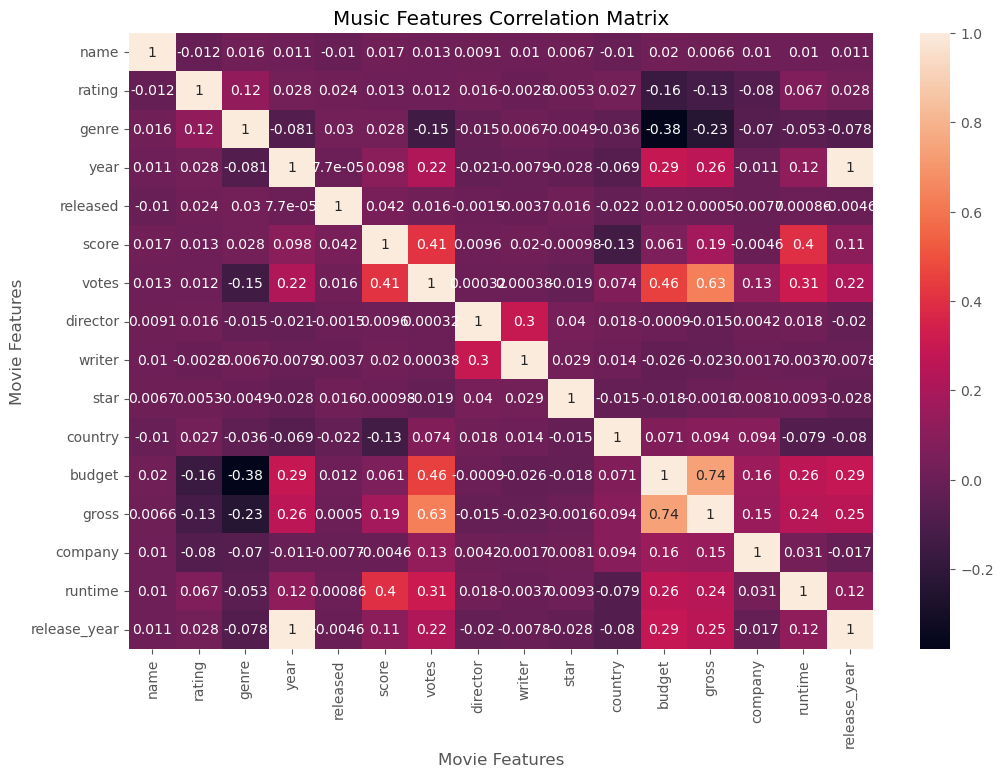

In [46]:
correlation_matrix = df_numerized.corr(numeric_only="True",method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title('Music Features Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [52]:
correlation_mat = df_numerized.corr()

correlation_pairs = correlation_mat.unstack()

correlation_pairs

name          name            1.000000
              rating         -0.012441
              genre           0.016355
              year            0.011453
              released       -0.010480
              score           0.017096
              votes           0.013056
              director        0.009079
              writer          0.010018
              star            0.006749
              country        -0.010425
              budget          0.019553
              gross           0.006601
              company         0.010369
              runtime         0.010386
              release_year    0.010699
rating        name           -0.012441
              rating          1.000000
              genre           0.123465
              year            0.027931
              released        0.024086
              score           0.013248
              votes           0.012286
              director        0.016255
              writer         -0.002795
              star       

In [54]:
Sorted_pairs = correlation_pairs.sort_values()

Sorted_pairs

genre         budget         -0.378628
budget        genre          -0.378628
genre         gross          -0.233385
gross         genre          -0.233385
rating        budget         -0.164331
budget        rating         -0.164331
genre         votes          -0.145291
votes         genre          -0.145291
score         country        -0.134575
country       score          -0.134575
rating        gross          -0.130478
gross         rating         -0.130478
genre         year           -0.081261
year          genre          -0.081261
release_year  country        -0.080091
country       release_year   -0.080091
rating        company        -0.079626
company       rating         -0.079626
runtime       country        -0.079268
country       runtime        -0.079268
release_year  genre          -0.077911
genre         release_year   -0.077911
              company        -0.070013
company       genre          -0.070013
year          country        -0.069423
country       year       

In [56]:
High_corr = Sorted_pairs[(Sorted_pairs) > 0.5]

High_corr

votes         gross           0.632120
gross         votes           0.632120
budget        gross           0.737644
gross         budget          0.737644
release_year  year            0.997415
year          release_year    0.997415
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
dtype: float64